In [16]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Suppressing all warnings
warnings.filterwarnings('ignore')

 - Question 1

In [2]:
virus_DF = pd.read_csv('virus_data.csv')
virus_DF.shape

(1250, 25)

 - Question 2

In [3]:
virus_DF["conversations_per_day"].value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

 - Question 4

In [4]:
from sklearn.model_selection import train_test_split
state = 4+76
train_virus_df, test_virus_df = train_test_split(virus_DF, test_size=0.2, random_state=state)

- Question 5

In [5]:
train_virus_df.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         86
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [6]:
test_virus_df.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         23
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

 - Question 6

<Axes: >

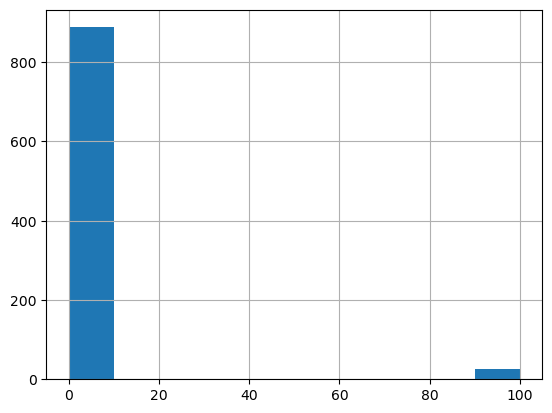

In [7]:
train_virus_df["household_income"].hist()

- Question 7

In [8]:
mean = train_virus_df["household_income"].mean()
median = train_virus_df["household_income"].median()
print(f"The mean household income {mean}, The median household income {median}")

The mean household income 3.535886214442013, The median household income 0.7


In [9]:
filtered_by_income = train_virus_df[train_virus_df["household_income"] < 3.5]
filtered_by_income["household_income"].count()

888

- We decided to replace the missing values with the median values, since the majority of the availabe values are under the mean

- Task A

In [18]:
replacement_value= train_virus_df["household_income"].median()
train_virus_df["household_income"] = train_virus_df["household_income"].fillna(replacement_value,inplace= True)